In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)
%matplotlib inline


In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [14]:
df = pd.read_pickle('/Users/huiru/GADataScience/FinalProject/Data/clean.pkl')

In [15]:
#drop these two columns because not useful right now
df.drop(['yr_born', 'yr_died'], axis=1, inplace=True)
#drop outliers
df = df.query('numlines < 500')
df = df.query('enj_score < 500')
df = df.query('numstanzas < 100')
df = df.query('avgline_stanza < 150')
df = df.query('title_lesk_abs < 2.0')
df = df.query('conjunction_ratio < 100')

In [16]:
len(df)
df.label.value_counts()

1    708
0    672
dtype: int64

In [17]:
# metrics.silhouette_score(X, labels, metric='euclidean')
X = df.ix[:, :-1]
for k in xrange(2,12):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    labels = km.labels_
    print k, metrics.silhouette_score(X, labels, metric='euclidean')

2 0.613420612737
3 0.49239413913
4 0.425555888176
5 0.454521621573
6 0.45856963306
7 0.440209279614
8 0.436041507254
9 0.433846578738
10 0.413809708588
11 0.333358458911


In [18]:
# df.label.value_counts()
df.columns[:-1]

# df.drop('')

Index([u'yrpub', u'numlines', u'numstanzas', u'avgline_stanza', u'enj_score',
       u'ttr', u'abstraction_score', u'lesk_abs_score', u'pronoun_score',
       u'title_lesk_abs', u'conjunction_ratio', u'nps_ratio', u'vps_ratio',
       u'aps_ratio', u'avg_nps_cscore', u'avg_vps_cscore', u'avg_aps_cscore',
       u'1_w_nps_fr', u'2_w_nps_fr', u'3_w_nps_fr', u'4_w_nps_fr',
       u'5_w_nps_fr', u'6_w_nps_fr', u'7_w_nps_fr', u'8_w_nps_fr',
       u'9_w_nps_fr', u'10_w_nps_fr', u'11_w_nps_fr', u'12_w_nps_fr',
       u'13_w_nps_fr', u'14_w_nps_fr', u'15_w_nps_fr', u'16_w_nps_fr'],
      dtype='object')

In [19]:
numerical_features = df.get(df.columns[:-1]) 
features_array = numerical_features
target = df.label.values
features_train, features_test, target_train, target_test = train_test_split(features_array, target, test_size=0.30, random_state=0)

In [20]:
# train logistic regression, evaluate on test
lr = LogisticRegression(C=1)
lr.fit(features_train, target_train)
    
#clf = train_test(data_out)
target_predicted = lr.predict(features_test)

print("Train Testing Results \n\n")

print(classification_report(target_test, target_predicted,
                         target_names=['not contemp', 'contemp']))

Train Testing Results 


             precision    recall  f1-score   support

not contemp       0.71      0.55      0.61       211
    contemp       0.62      0.76      0.68       203

avg / total       0.66      0.65      0.65       414



In [21]:
proba_lr = lr.predict_proba(features_test)

print proba_lr[:5]

[[ 0.49028026  0.50971974]
 [ 0.70263877  0.29736123]
 [ 0.42497946  0.57502054]
 [ 0.55469596  0.44530404]
 [ 0.31215202  0.68784798]]


In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba, this_label):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label= this_label + ', ROC Area = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC')
    plt.legend(loc="lower right")

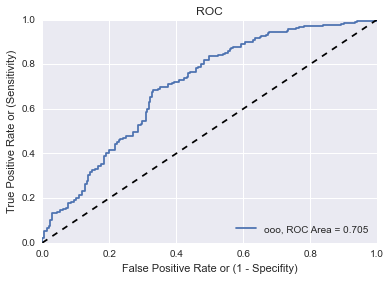

In [23]:
plot_roc_curve(target_test, proba_lr, "ooo")

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(features_train, target_train)
preds = nb.predict(features_test)
preds

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0,

In [25]:
print metrics.accuracy_score(target_test, preds)
print metrics.confusion_matrix(target_test, preds)

0.550724637681
[[154  57]
 [129  74]]


#Let's try running a decision tree classifier and seeing if that is better than logistic regression

In [26]:
featurecols = ['numlines','numstanzas' ,'avgline_stanza','enj_score','ttr',
             'abstraction_score', 'lesk_abs_score', 'pronoun_score', 'title_lesk_abs', 'conjunction_ratio',
             'nps_ratio','vps_ratio','aps_ratio','avg_nps_cscore','avg_vps_cscore','avg_aps_cscore',
             '1_w_nps_fr','2_w_nps_fr','3_w_nps_fr','4_w_nps_fr','5_w_nps_fr','6_w_nps_fr','7_w_nps_fr',
             '8_w_nps_fr','9_w_nps_fr','10_w_nps_fr','11_w_nps_fr','12_w_nps_fr','13_w_nps_fr', '14_w_nps_fr',
             '15_w_nps_fr','16_w_nps_fr'
            ]

In [27]:
X = df[featurecols]
y = df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=1)
 
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train) 
preds = treeclf.predict(X_test)

In [28]:
print metrics.accuracy_score(y_test, preds)
print metrics.confusion_matrix(y_test, preds)

0.591787439614
[[ 65 128]
 [ 41 180]]


In [29]:
# compute the feature importances
pd.DataFrame({'feature':featurecols, 'importance':treeclf.feature_importances_}).sort('importance', ascending = False)

,feature,importance
11,vps_ratio,0.257642
4,ttr,0.196631
0,numlines,0.141317
9,conjunction_ratio,0.140419
1,numstanzas,0.101885
7,pronoun_score,0.095130
12,aps_ratio,0.066975
29,14_w_nps_fr,0.000000
28,13_w_nps_fr,0.000000
27,12_w_nps_fr,0.000000
